In [1]:
import pickle
import numpy as np

with open('final_training_results/final_results[48, 48, 48]_[2, 4, 8].pkl', 'rb') as f:
    model_data = pickle.load(f)

membrane_potentials = model_data['membrane_potentials']
spike_outputs = model_data['spike_outputs']
synaptic_currents = model_data['synaptic_currents']


print(f"Sample membrane potentials: {membrane_potentials[:2]}")
print(f"Sample spike outputs: {spike_outputs[:2]}")
print(f"Sample synaptic currents: {synaptic_currents[:2]}")

Sample membrane potentials: [array([ 3.73637736e-01, -7.10415468e-03,  5.72637796e-01, -1.68843579e+00,
       -1.24407023e-01, -4.64412123e-01, -1.24952346e-01, -1.86229229e+00,
        3.54195654e-01,  9.32800710e-01,  7.35679984e-01,  4.38293606e-01,
        6.16297841e-01, -9.18395370e-02, -2.91517437e-01, -1.24669909e+00,
        1.83394074e-01,  8.98599625e-04, -2.32827038e-01, -2.14442834e-02,
       -6.32429242e-01, -2.10877910e-01,  7.46864438e-01, -2.11138457e-01,
        5.36402941e-01, -1.60431676e-03, -3.19949508e-01, -3.26806128e-01,
       -5.15740097e-01, -3.18573117e-02, -4.72791106e-01,  5.01250863e-01,
       -4.27003950e-01,  6.12963796e-01,  7.21859813e-01,  2.21751779e-01,
        1.17540069e-01, -1.76014066e+00,  7.67391920e-01, -1.41181517e+00,
       -6.67098820e-01, -1.09640932e+00,  6.48187995e-01,  1.14314884e-01,
       -5.60296059e-01,  6.33860588e-01, -4.19359565e-01,  2.92958140e-01],
      dtype=float32), array([-0.32938075,  0.2168907 ,  0.06585924, -0

In [2]:
predictions_train = np.concatenate(model_data['predictions_train'])
predictions_val = np.concatenate(model_data['predictions_val'])
ground_truths_train = np.concatenate(model_data['ground_truths_train'])
ground_truths_val = np.concatenate(model_data['ground_truths_val'])

predictions_0 = predictions_train[ground_truths_train==0]
predictions_1 = predictions_train[ground_truths_train==1]
predictions_1_flat = predictions_1.flatten()
predictions_0_flat = predictions_0.flatten()

In [3]:
predictions_0.shape, predictions_1.shape


((836, 101, 1), (836, 101, 1))

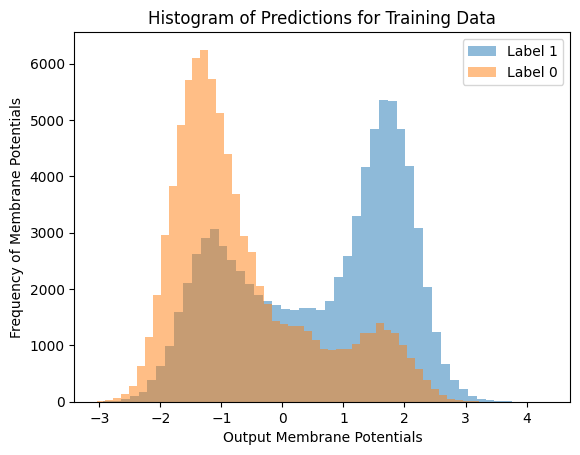

In [4]:
import matplotlib.pyplot as plt

plt.hist(predictions_1_flat, bins=50, alpha=0.5, label='Label 1')
plt.hist(predictions_0_flat, bins=50, alpha=0.5, label='Label 0')

plt.xlabel('Output Membrane Potentials')
plt.ylabel('Frequency of Membrane Potentials')
plt.legend(loc='upper right')
plt.title('Histogram of Predictions for Training Data')
plt.show()

In [5]:
from rockpool.nn.networks import SynNet
import torch

device = torch.device("cpu")

model = SynNet(
    output="vmem",  
    n_channels=16,                        
    n_classes=1,
    dt=10e-3,                           
    size_hidden_layers=[48, 48, 48],
    time_constants_per_layer=[2, 4, 8],
    tau_syn_base=0.02,  
    tau_mem=0.02,
    tau_syn_out=0.02,
    train_threshold = True,
    p_dropout = 0.2
).to(device)


# Load the saved state into the model
model_state_path = 'final_training_results/final_state[48, 48, 48]_[2, 4, 8].pt'
model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.reset_state()
model.eval()

/opt/anaconda3/envs/capstone_gpu/lib/python3.8/site-packages/rockpool/nn/networks/__init__.py:15: UserWarning: This module needs to be ported to teh v2 API.
  warnings.warn(f"{err}")
/opt/anaconda3/envs/capstone_gpu/lib/python3.8/site-packages/rockpool/nn/networks/__init__.py:20: UserWarning: This module needs to be ported to the v2 API.
  warnings.warn(f"{err}")
/var/folders/ww/sdpjdv8n5bxg6ylcbh7qm0vc0000gn/T/ipykernel_78494/2563707628.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be lo

SynNet  with shape (16, 1) {
    TorchSequential 'seq' with shape (16, 1) {
        LinearTorch '0_LinearTorch' with shape (16, 48)
        LIFTorch '1_LIFTorch' with shape (48, 48)
        TimeStepDropout '2_TimeStepDropout' with shape (48,)
        LinearTorch '3_LinearTorch' with shape (48, 48)
        LIFTorch '4_LIFTorch' with shape (48, 48)
        TimeStepDropout '5_TimeStepDropout' with shape (48,)
        LinearTorch '6_LinearTorch' with shape (48, 48)
        LIFTorch '7_LIFTorch' with shape (48, 48)
        TimeStepDropout '8_TimeStepDropout' with shape (48,)
        LinearTorch '9_LinearTorch' with shape (48, 1)
        LIFTorch '10_LIFTorch' with shape (1, 1)
    }
}